# Evaluation of the long term dynamics of the model.

Data from runs over 3000 years for different possible income from trade.

Single trajectories are also evaluated, since the aggregate data does not give insight into the actual model behavior.

**NOTE:** These runs are done without climate variability. The variation is only caused by interplay of social and ecological dynamics in the system.

In [161]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

d_start = 150
d_length = 20

testing = False
trj = pd.read_pickle('/home/jakob/Project_MayaSim/Python/output_data/test_output/X8_longterm_dynamics/raw_data/6000-_s0.pkl')['trajectory']
trj.head()

Populating the interactive namespace from numpy and matplotlib


/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,time,total_population,max settlement population,total_migrants,total_settlements,total_agriculture_cells,total_cells_in_influence,total_trade_links,mean_cluster_size,max_cluster_size,...,es_income_precipitation,es_income_pop_density,MAP,max_npp,mean_waterflow,max_AG,max_ES,max_bca,max_soil_deg,max_pop_grad
0,1,415240,21214,19182,48,462,10998,4.0,2.000000,2,...,0.0,0.0,1630.514364,2439.893777,0.287864,755.589090,8338.289792,1075.992598,5.0,15.0
1,2,428296,22632,11510,61,497,10736,8.0,2.000000,2,...,0.0,0.0,1630.514364,2439.893777,0.287864,755.589090,8338.289792,1075.992598,10.0,15.0
2,3,443311,23985,10438,73,531,10804,12.0,2.130435,3,...,0.0,0.0,1716.330910,2444.397120,0.305660,762.942327,25985.128941,1076.893236,15.0,15.0
3,4,458066,25319,8083,80,560,10819,14.0,2.250000,3,...,0.0,0.0,1716.330910,2444.397120,0.305660,762.942327,25985.126597,1076.893236,20.0,15.0


In [182]:
pylab.rcParams['figure.figsize'] = (14, 14)

fig = plt.figure()



for t in range(1,5):
    ax = fig.add_subplot(1,1,1)
    location = '/home/jakob/Project_MayaSim/Python/output_data/test_output/X8_longterm_dynamics/raw_data/6000-_s0/geographic_data_{0:03d}.pkl'.format(t)

    data = np.load(location)

    forest = data['forest']

    # plot forest state
    
    shape = forest.shape
    print(shape)
    
    cropped = np.zeros(shape)
    influenced = np.zeros(shape)
    
    cropped_cells = data['cropped cells']
    influenced_cells = data['cells in influence']
    
    for city in range(len(data['x positions'])):
        if len(cropped_cells[city]) > 0:
            influenced[influenced_cells[city][0], influenced_cells[city][1]] = 1
            cropped[cropped_cells[city][0], cropped_cells[city][1]] = 1
            
    forest[cropped == 1] = 4
    
    cmap1 = ListedColormap(['blue', '#FF9900', '#66FF33', '#336600', 'black'])
    norm = Normalize(vmin=0, vmax=4)
    im1 = ax.imshow(forest, 
                     cmap=cmap1, 
                     norm=norm, 
                     interpolation='none',
                     alpha=0.9,
                     zorder=0)
    
    cmap2 = ListedColormap([(0,0,0), 'grey'])
    im2 = ax.imshow(influenced,
                     cmap=cmap2,
                     alpha=0.3,
                     zorder=0)

    # plot trade network from adjacency matrix and settlement positions

    for i, xi in enumerate(zip(data['y positions'], data['x positions'])):
        for j, xj in enumerate(zip(data['y positions'], data['x positions'])):
            if data['adjacency'][i, j] == 1:
                plt.plot([xi[0], xj[0]], [xi[1], xj[1]], color='black', zorder=1)

    # plot settlements with population as color and rank as size

    max_population = trj['max settlement population'].max()

    cmap = plt.get_cmap('OrRd')
    sct = plt.scatter(data['y positions'],
                      data['x positions'],
                      [15 * (x+1) for x in data['rank']], 
                      c=data['population'], 
                      cmap=plt.get_cmap('OrRd'),
                      edgecolors='black',
                      zorder=2,
                      vmax = max_population)
    fig.colorbar(sct, label='population')
    ax.set_ylim([shape[0], 0])
    ax.set_xlim([0, shape[1]])
    
    fig.savefig('frame_{0:03d}'.format(t))
    fig.clear()


            

(432, 400)
(432, 400)
(432, 400)
(432, 400)


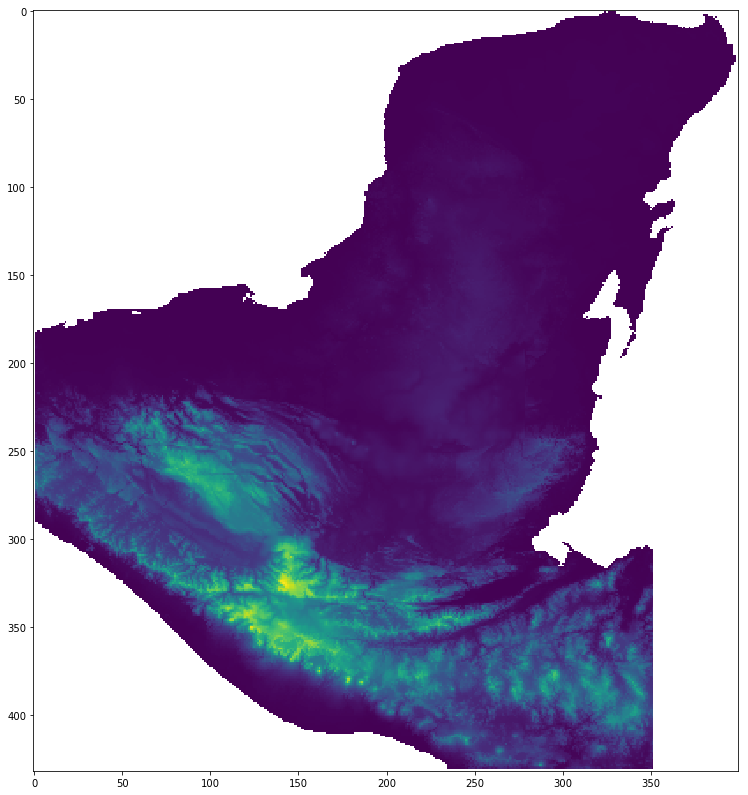

In [158]:
fig = plt.figure()

forest = data['elev']

cmap = ListedColormap(['#FF9900', '#66FF33', '#336600', 'blue'])
norm = Normalize(vmin=0, vmax=3)
im3 = plt.imshow(forest)